In [1]:
#Reference
import numpy as np
import scipy as sp
from scipy.spatial import KDTree
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import math

import os
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Sampling from Guassian => Find P(0) (using KDE); The Model of 0 Vector
#d==dimension
d=2
mean = np.ones(d)

#Define Gaussian Class
class Gaussian:
    def __init__(self, covmat=(0.1)*np.diag(v=np.ones(len(mean)), k=0)):
        self.covmat = covmat        
    def evaluate(self, x, mean):
        cov = self.covmat
        inv_cov = np.linalg.inv(cov)
        if (np.linalg.det(2*np.pi*cov))**(-0.5) >= 0.0:
            return((2*np.pi*(np.linalg.det(cov)))**(-0.5)*np.exp((-0.5)*(x-mean)@inv_cov@(x-mean)))
        else:
            print("Determinant of covariance matrix is not positive definite.")

#Sample Points from Gaussian
g = Gaussian()
mean = np.ones(d)
x=np.zeros(len(mean))
covariance = np.diag(v=np.ones(len(mean)), k=0)
samples = np.random.multivariate_normal(mean, covariance, size=1000000)
P0 = 0
for m in samples:
    P0 += (1000000)**(-1.0)*g.evaluate(x,m)
   
#print(samples)
print(P0)
print(len(mean))  #Check dim

0.14624610518529127
2


[0.39839554 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
[0.39839554 0.18177122 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
[0.39839554 0.18177122 0.10359198 0.         0.         0.
 0.         0.         0.         0.         0.        ]
[0.39839554 0.18177122 0.10359198 0.18189299 0.         0.
 0.         0.         0.         0.         0.        ]
[0.39839554 0.18177122 0.10359198 0.18189299 0.24457216 0.
 0.         0.         0.         0.         0.        ]
[0.39839554 0.18177122 0.10359198 0.18189299 0.24457216 0.15311111
 0.         0.         0.         0.         0.        ]
[0.39839554 0.18177122 0.10359198 0.18189299 0.24457216 0.15311111
 0.18308277 0.         0.         0.         0.        ]
[0.39839554 0.18177122 0.10359198 0.18189299 0.24457216 0.15311111
 0.18308277 0.14333942 0.         0.         0.        ]
[0.39839554 0.18177122 0.10359198 0.18189299 0.2

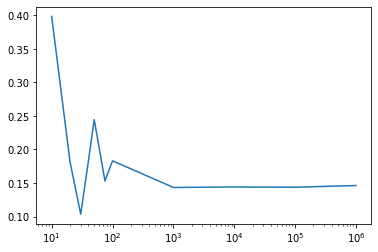

In [3]:
#Generate Random Samples, Used as a check to see convergence
sample_length = [10, 20, 30, 40, 50, 75, 100, 1000, 10000, 100000, 1000000]
pval = np.zeros(len(sample_length))
for i in range(len(sample_length)):
    length = sample_length[i]
    samples = np.random.multivariate_normal(mean, covariance, size=length)
    P=0
    for m in samples:
        P += (length)**(-1.0)*g.evaluate(x,m)
    
    pval[i] = P
    print(pval)

plt.plot(sample_length, pval)
plt.xscale('log')

In [4]:
#KD-Tree Time :O
#From sample lengths, find k+1 nearest neighbors with kdtree, k=100 nearest neighbors
kdtree = KDTree(samples)
query = kdtree.query(x=np.zeros(d), k=1000)
#Query KD-Tree for nearest Neighbors
print(query)
index = query[1]
print(index)
data = kdtree.data[index]
#Get data points of the nearest neighbors
print(data)

(array([0.00457746, 0.00474745, 0.00509042, 0.0050975 , 0.0060967 ,
       0.00610041, 0.00634299, 0.00642442, 0.00689266, 0.00712338,
       0.00777991, 0.0081973 , 0.00859253, 0.00879017, 0.00901607,
       0.01048796, 0.01071264, 0.01072569, 0.01143742, 0.01149507,
       0.01162716, 0.01177953, 0.01205749, 0.01213396, 0.01216167,
       0.01270333, 0.01278364, 0.01301979, 0.01313228, 0.01314363,
       0.01341568, 0.01352786, 0.01353846, 0.01376639, 0.01377291,
       0.01377455, 0.01387241, 0.01407366, 0.01417954, 0.01456905,
       0.01478491, 0.01479502, 0.01503609, 0.0150623 , 0.01526292,
       0.01536055, 0.01539555, 0.01573414, 0.01574618, 0.01600239,
       0.01621638, 0.01622061, 0.01628002, 0.01632359, 0.01642536,
       0.01656324, 0.01658336, 0.01697241, 0.01697285, 0.01701782,
       0.01742491, 0.01745522, 0.0175402 , 0.01805735, 0.01810039,
       0.01821906, 0.01839421, 0.01854883, 0.01857991, 0.01902607,
       0.0191038 , 0.01916595, 0.01921385, 0.01925776, 0.0193

In [5]:
#Gaussian Around Sampled Points

pvalsamples = np.zeros(len(samples))

#Pick one data point as modelled point, compare every other point to "modelled" point
for i in range(len(samples)):
    modpoint = samples[i]
    modquery = kdtree.query(modpoint, k=1000)
    modindex = modquery[1]
    moddata = kdtree.data[modindex]
    print('\r' +str(i),end='')
    Pd = (1/1000)
    for j in range(len(moddata)):
        Pd += (1000)**(-1.0)*g.evaluate(moddata[j], modpoint)
        
    pvalsamples[i] = Pd #Pval of samples 

#print(len(data))
#print(data)

print(pvalsamples)

55081

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



216560

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



382995

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



548775

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



725427

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



900101

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
#Compare Values Pi to P0
#Want to count all points that satify (Pi > P0) for integration; save other points for later

Accept = []   #Accept Pi >= P0
Reject = []   #Reject because Pi < P0

for i in range(len(pvalsamples)):
    Pi = pvalsamples[i]
    if (Pi >= P0):
        #print('Yeehaw!')
        Accept.append([i,Pi])
    else:
        #print('Nope lol, you tried')
        Reject.append([i,Pi])

print(len(Accept))
print(len(Reject))

#print(Accept)
#print(Reject)  

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
999832
168


In [7]:
#Which Pi < P0 to accept b/c boundary point? Redemption time!
# k==Nearest Neighbors, if nearest neighbor number is too low, won't count points that are maybe important

NN= int(1000)

Redemption = []
Death = []

# Reject[i] = [index,Pval]
for i in range(len(Reject)):
    Re = Reject[i][1] #Pval
    if (Re*(len(samples)- NN) >= P0):
        Redemption.append(Reject[i][0]) #append index
    else:
        Death.append(Re)
        
print(len(Redemption), len(Death))
print(Redemption)

168 0
[1152, 12572, 18576, 25037, 30920, 39395, 44178, 56990, 60004, 60883, 62773, 63952, 65497, 72939, 78834, 82934, 89667, 100659, 102739, 116521, 125201, 126624, 133872, 135746, 136252, 141056, 155558, 155915, 159787, 165137, 170449, 170512, 171710, 172642, 176901, 181851, 197901, 201577, 201853, 215339, 229288, 237075, 247281, 257228, 269357, 274508, 279145, 290649, 295516, 300892, 306255, 308064, 308418, 313940, 318402, 325538, 326153, 327370, 331455, 361528, 371495, 375875, 376648, 379849, 384969, 386796, 387778, 397194, 405554, 405789, 410913, 413758, 420979, 427208, 428580, 429343, 430713, 433099, 435911, 437875, 448025, 451428, 455217, 458833, 480785, 493941, 497904, 507065, 511902, 519159, 521280, 522008, 523149, 530173, 537012, 541918, 553711, 554482, 568184, 571385, 573005, 580844, 585265, 586470, 593048, 595882, 597607, 606263, 623639, 626818, 629270, 631148, 637289, 640115, 641770, 645800, 656592, 658240, 670166, 679898, 685896, 690004, 692759, 693817, 694555, 698291, 702

In [8]:
#Redemption needs to be KDTree'd to find it's nearest nearest neighbors, but better than before
#What might be work is instead of adding the pval to an array, add the index of the points that pass of fail. 
#So if the 357th point fails, you can just call samples[357] to get the point again

pxiarray = np.zeros(len(Redemption))
for i in range(len(Redemption)):
    xi = samples[Redemption[i]]
    xiquery = kdtree.query(xi, k=len(samples))
    xiindex = xiquery[1]
    xidata = kdtree.data[xiindex]   #Points that are NN
    Pxi = (len(samples))**(-1.0)
    for j in range(5*NN):
        Pxi += (len(samples))**(-1.0)*g.evaluate(xi, xidata[j])

    pxiarray[i]=Pxi

print(pxiarray)     

[3.26969834e-05 1.36019827e-04 1.20665888e-04 1.40893774e-04
 3.19208001e-05 4.09284613e-05 6.17653379e-05 2.28317315e-05
 1.45922163e-04 5.26802632e-05 1.09752288e-04 8.34928929e-05
 1.26734959e-04 1.23159820e-04 1.13305492e-04 2.65313071e-05
 1.19089532e-04 1.00130023e-04 1.37321450e-05 2.48933886e-05
 1.41145807e-04 1.41527960e-04 7.87699106e-05 3.52634312e-05
 1.12675661e-04 1.22512464e-04 6.46697558e-05 1.10391136e-04
 1.25522587e-04 6.82914370e-05 1.16774191e-04 7.41627595e-05
 8.24914921e-05 4.27068013e-05 2.32604299e-05 1.37917076e-04
 5.28475770e-05 1.40680614e-04 1.45440439e-04 1.09372656e-04
 9.65079764e-05 5.35258699e-05 8.84417297e-05 9.31931696e-05
 1.22897749e-04 1.44368026e-04 1.76633318e-05 1.12667182e-04
 8.21948611e-05 1.12825698e-04 2.73287313e-05 1.34714095e-04
 9.86847178e-05 2.59622915e-05 5.98190722e-05 7.89218432e-05
 1.09979224e-04 8.46106629e-05 3.78025812e-05 9.34995001e-05
 6.69999327e-05 1.24993121e-04 1.29226249e-04 1.34903379e-04
 9.27062211e-06 9.005244

In [9]:
#Check same conditions as before
Accept1 = []
Reject1 =[]
for i in range(len(pxiarray)):
    pxi = pxiarray[i]
    if (pxi >= P0):
        Accept1.append([i,pxi])
    else:
        Reject1.append([i, pxi])

print(len(Accept1))
print(len(Reject1))

0
168


In [10]:
#Out on the side, who will survive? How many points were lost in the fires of rejected points lol


Redemption1 = []
Death1 = []

for i in range(len(Reject1)):
    Re1 = Reject1[i][1] #Pval
    if (Re1*(len(samples)- NN) >= P0):
        Redemption1.append(Reject1[i][0]) #append index
    else:
        Death1.append(Re1)
        
print(len(Redemption1), len(Death1))
print(Redemption1)

168 0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167]
